In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd



df = pd.read_csv("/content/drive/My Drive/Latestv2.csv")

In [0]:
df.new_failure.value_counts()

0    2151997
1       4699
Name: new_failure, dtype: int64

Splitting target and features

In [0]:
X = df.drop(["new_failure", "date", "serial_number","model"], axis=1)
y = df["new_failure"]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y)

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)

In [0]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [0]:
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def get_model_roc(models, Xs_test, names, Y_test):
    plt.rcParams['figure.dpi'] = 100
    for i in range(len(models)):
        model = models[i]
        name = names[i]
        probs = model.predict_proba(Xs_test)[:,1]
        probs1 = model.predict(Xs_test)
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs)
        plt.plot(fpr, tpr, label=name)
        plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        print ("AUC for {0} = {1:.3f}".format(name, metrics.roc_auc_score(Y_test, probs)))
        print ("Accuracy - " , metrics.accuracy_score(Y_test ,probs1))
        print("Confusion Matrix: \n", confusion_matrix(Y_test, probs1, labels=[0,1]))
        tn, fp, fn, tp = confusion_matrix(Y_test, probs1, labels=[0,1]).ravel()
        print("True Negative - ", tn)
        print("False Positive - ", fp)
        print("False Negative - ", fn)
        print("True Positive - ", tp)
    plt.legend()
    plt.show()
    

AUC for Logistic Regresion = 0.575
Accuracy -  0.0021792582308397495
Confusion Matrix: 
 [[     0 753199]
 [     0   1645]]
True Negative -  0
False Positive -  753199
False Negative -  0
True Positive -  1645


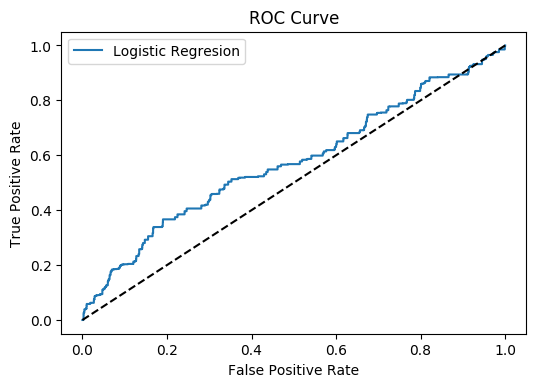

In [0]:
get_model_roc([LR], X_test, ['Logistic Regresion'], y_test)

# Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

AUC for DecisionTree = 0.962
Accuracy -  0.9995045333870309
Confusion Matrix: 
 [[752994    205]
 [   169   1476]]
True Negative -  752994
False Positive -  205
False Negative -  169
True Positive -  1476


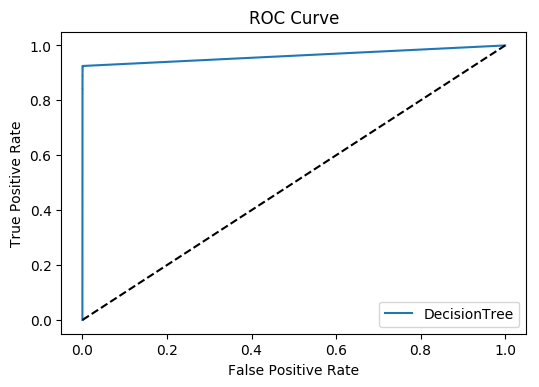

In [0]:
get_model_roc([DT], X_test, ['DecisionTree'], y_test)

# Adaboosted Decision Tree Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ad_dt = AdaBoostClassifier(DecisionTreeClassifier())
ad_dt.fit(X_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AUC for AdaBoosted Decision Tree = 0.953
Accuracy -  0.9995469262523118
Confusion Matrix: 
 [[753027    172]
 [   170   1475]]
True Negative -  753027
False Positive -  172
False Negative -  170
True Positive -  1475


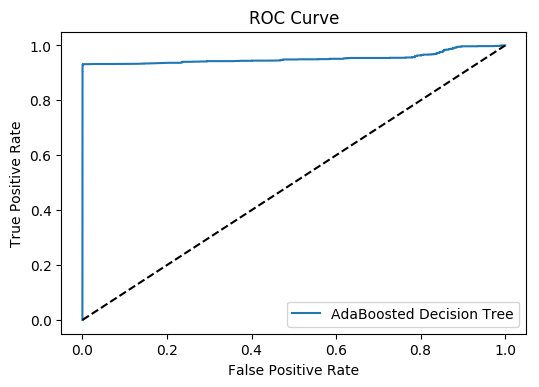

In [0]:
get_model_roc([ad_dt], X_test, ['AdaBoosted Decision Tree'], y_test)

# Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

AUC for Gradient Boosting = 0.868
Accuracy -  0.9983188579362093
Confusion Matrix: 
 [[753057    142]
 [  1127    518]]
True Negative -  753057
False Positive -  142
False Negative -  1127
True Positive -  518


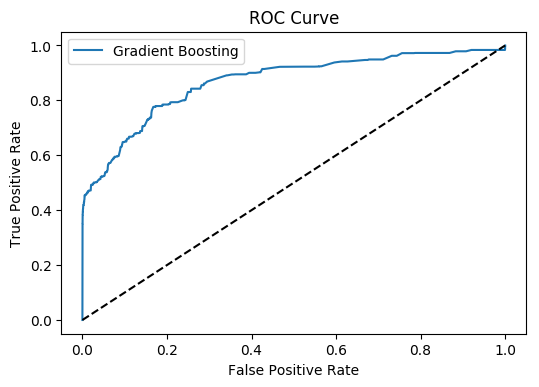

In [0]:
get_model_roc([model_GB], X_test, ['Gradient Boosting'], y_test)

# Xgboost

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier


xg_reg = xgb.XGBClassifier(eval_metric="error", max_depth = 4, scale_pos_weight=400, subsample=0.5, alpha = 10, n_estimators = 10)

#xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
              # max_depth = 5, alpha = 10, n_estimators = 10)


xg_reg.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='error', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=400, seed=None, silent=True,
       subsample=0.5)

AUC for XgBoost = 0.821
Accuracy -  0.8430337924127369
Confusion Matrix: 
 [[635396 117803]
 [   682    963]]
True Negative -  635396
False Positive -  117803
False Negative -  682
True Positive -  963


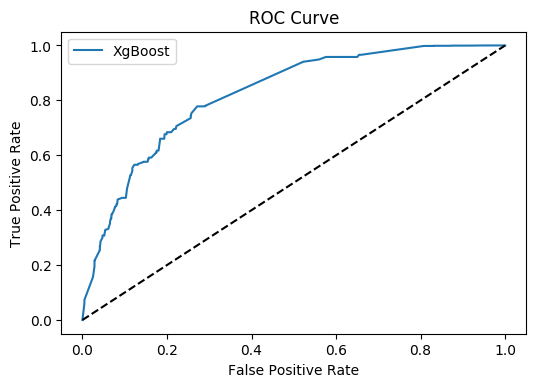

In [0]:
#XGB.fit(X_train, y_train, eval_set=eval_set,
#        eval_metric="auc", early_stopping_rounds=2)

get_model_roc([xg_reg], X_test, ['XgBoost'], y_test)

# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

AUC for KNN = 0.964
Accuracy -  0.9993097911621475
Confusion Matrix: 
 [[753056    143]
 [   378   1267]]
True Negative -  753056
False Positive -  143
False Negative -  378
True Positive -  1267


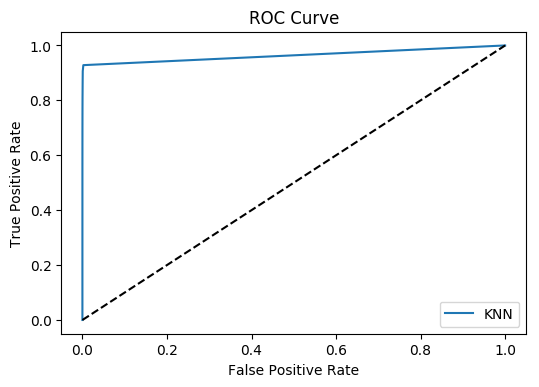

In [0]:
get_model_roc([knn], X_test, ['KNN'], y_test)

AUC for KNN = 0.964
Accuracy -  0.9993097911621475
Confusion Matrix: 
 [[753056    143]
 [   378   1267]]
True Negative -  753056
False Positive -  143
False Negative -  378
True Positive -  1267
AUC for Logistic Regresion = 0.575
Accuracy -  0.0021792582308397495
Confusion Matrix: 
 [[     0 753199]
 [     0   1645]]
True Negative -  0
False Positive -  753199
False Negative -  0
True Positive -  1645
AUC for DecisionTree = 0.962
Accuracy -  0.9995045333870309
Confusion Matrix: 
 [[752994    205]
 [   169   1476]]
True Negative -  752994
False Positive -  205
False Negative -  169
True Positive -  1476
AUC for AdaBoosted Decision Tree = 0.953
Accuracy -  0.9995469262523118
Confusion Matrix: 
 [[753027    172]
 [   170   1475]]
True Negative -  753027
False Positive -  172
False Negative -  170
True Positive -  1475
AUC for Gradient Boosting = 0.868
Accuracy -  0.9983188579362093
Confusion Matrix: 
 [[753057    142]
 [  1127    518]]
True Negative -  753057
False Positive -  142
False 

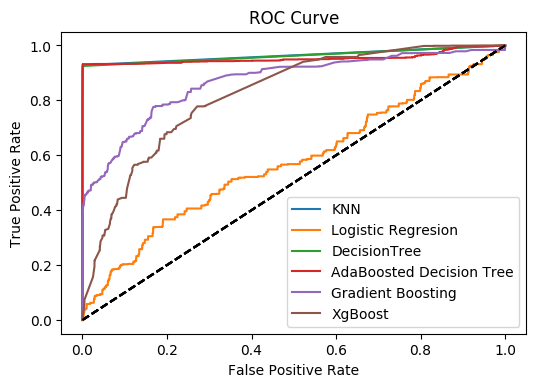

In [0]:
get_model_roc([knn, LR, DT, ad_dt, model_GB, xg_reg], X_test, ['KNN', 'Logistic Regresion', 'DecisionTree', 'AdaBoosted Decision Tree', 'Gradient Boosting', 'XgBoost'], y_test)